# 스택 & 큐

###스택(Stack) : 자료를 한쪽으로 보관하고 꺼내는 LIFO(Last In First Out) 방식의 자료구조


스택 사용
1. 함수 호출 기록을 스택으로 저장
2. 웹 브라우저 뒤로가기 기능


스택 맨 위에 자료 추가 : PUSH O(1)

스택 맨 위에 자료 제거 : POP O(1)

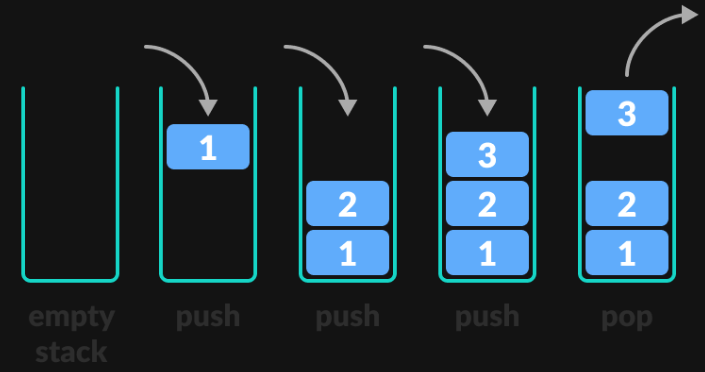

스택 장점 
1. 구조 단순하여 구현 용이
2. 데이터 저장/읽기 속도 빠름

스택 단점
1. 데이터 최대 개수 지정 필요 (고정된 사이즈의 메모리를 갖는 array로 구현됨)
2. 저장 공간 낭비 발생 가능


사용 방법 : 리스트와 동일(파이썬에서 스택은 리스트로 구현되어 있다)

In [ ]:
a_list = [1,2,3]
a_list.append(1)
print(a_list)

[1, 2, 3, 1]


In [ ]:
a_list = [1,2,3]
a_list.pop()
print(a_list)

[1, 2]


재귀 함수가 4 -> 0 순으로 쌓이고 0 - > 4 순으로 처리된다.

In [ ]:
# 재귀 함수
def recursive(data):
  if data < 0:
      print ("ended")
  else:
      print(data)
      recursive(data - 1)
      print("returned", data)

recursive(4)

4
3
2
1
0
ended
returned 0
returned 1
returned 2
returned 3
returned 4


stack 필수 기능 구현

In [13]:

class Stack:
    # 빈 스택 생성
    def __init__(self):
      self.stack = []

    # 스택이 비어있으면 True 반환
    def isEmpty(self):
      if len(self.stack) == 0:
        return True
      else:
        return False

    # 스택에 요소 추가
    def push(self, data):
      self.stack.append(data)

    # 마지막에 들어온 요소 반환 후 제거
    def pop(self):
      if self.isEmpty():
        return "Stack is empty"
      else:
        return self.stack.pop()
    # 마지막에 들어온 요소 제거하지 않고 반환
    def top(self):
      if self.isEmpty():
        return "Stack is empty"
      else:
        return self.stack[-1]

In [12]:
stack = Stack()
print("isEmpty: ", stack.isEmpty()) 
stack.push(1)
stack.push(2)
stack.push(3)
print("pop", stack.pop())
print("top", stack.top())
print("pop", stack.pop())

isEmpty:  True
pop 3
top 2
pop 2


###큐 : 한쪽 끝에서 자료를 넣고 반대쪽 끝에서 자료를 뺄 수 있는 (FIFO)방식의 자료구조

큐 사용
1. 번호표를 이용한 줄서기와 같은 경우
2. CPU 스케줄러, 소켓 통신(메시지 큐) 등등


큐 자료 추가 : PUSH O(1)

큐 자료 제거 : POP O(1)

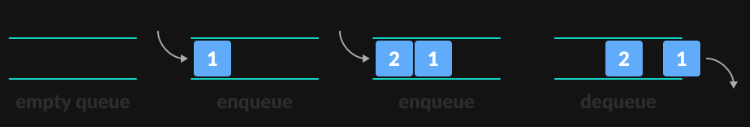

파이썬에서 대표적인 큐 사용 방법 
1. 리스트 사용
2. Collections 모듈의 deque 사용

In [ ]:
# 리스트
queue = [1, 2, 3]
queue.append(4)
queue.append(5)
print(queue)
queue.pop(0)
queue.pop(0)
print(queue)

[1, 2, 3, 4, 5]
[3, 4, 5]


In [ ]:
# deque(방향 0)
from collections import deque
queue = deque([1, 2, 3])
queue.append(4)
queue.append(5)
print(queue)
queue.popleft()
queue.popleft()
print(queue)

deque([1, 2, 3, 4, 5])
deque([3, 4, 5])


list 방식과 deque 방식의 성능 비교

In [ ]:
import time
from collections import deque


def insert_and_pop(container, desc):
    arr = range(10000000)

    start = time.time()
    for n in arr:
        container.append(arr)
    print(f'{desc}, 삽입 수행 시간, {time.time() - start} 초')

    start = time.time()
    for i in range(1000):
        if type(container) is list:
            container.pop(0)
        else:
            container.popleft()
    print(f'{desc}, pop(0) 수행 시간, {time.time() - start} 초')



l = list()
d = deque()

insert_and_pop(l, 'list')
print()
insert_and_pop(d, 'deque')

list, 삽입 수행 시간, 1.1454803943634033 초
list, pop(0) 수행 시간, 7.404253721237183 초

deque, 삽입 수행 시간, 0.7858545780181885 초
deque, pop(0) 수행 시간, 0.000194549560546875 초


삽입 수행 시간은 list에 비해 deque가 약간 빠르다.


pop(0) 수행 시간은 list에 비해 deque가 많이 빠르다

차이 나는 이유 : LIST는 고정된 array로 구현되어 있기 때문에 삭제 후 모든 값을 이동시켜야 한다.

하지만 deque는 double linked list로 구현되어 있기 때문에 삭제 후 모든 값을 이동 시킬 필요가 없다.

따라서 queue 사용 시 list가 아닌 deque를 사용하는 것이 더 좋다!

In [30]:
class Queue_:
    def __init__(self):
      # 빈 큐 생성
      self.queue = []
    
    # 큐에 요소 추가하기
    def enqueue(self, data):
      self.queue.append(data)

    # 처음 들어온 요소 반환 후 제거
    def dequeue(self):
      dequeue_object = None
      if self.isEmpty():
          print("Queue is Empty")
      else:
          dequeue_object = self.queue[0]
          self.queue = self.queue[1:]
            
      return dequeue_object
    
    # 큐가 비어있지 않으면 처음 들어온 요소 반환
    def peek(self):
      peek_object = None
      if self.isEmpty():
          print("Queue is Empty")
      else:
          peek_object = self.queue[0]
            
      return peek_object

    # 큐가 비어있는지 확인     
    def isEmpty(self):
      is_empty = False
      if len(self.queue) == 0:
          is_empty = True
      return is_empty

In [39]:
q = Queue_()
print("isEmpty: ", q.isEmpty())
q.enqueue(1)
q.enqueue(2)
q.enqueue(3)
print("dequeue: ", q.dequeue())
print("peek:  ", q.peek())
print("dequeue: ", q.dequeue())

isEmpty:  True
dequeue:  1
peek:   2
dequeue:  2
